<a href="https://colab.research.google.com/github/shazeem786/Practice-Projects.-/blob/main/hr_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

import numpy as np 
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
# sns.color_palette("Set3", as_cmap=True)
sns.set_style('darkgrid')
%matplotlib inline

In [4]:
import xgboost as xgb 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer 
from sklearn.model_selection import GridSearchCV


# Import data 

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/shazia/WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

**Univariate** **analysis**

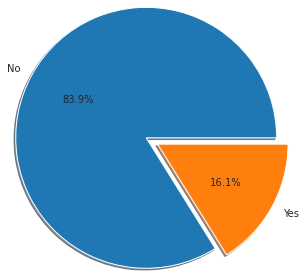

In [ ]:
r = data.groupby('Attrition')['Attrition'].count()
plt.pie(r, explode=[0.05, 0.1], labels=['No', 'Yes'], radius=1.5, autopct='%1.1f%%',  shadow=True);

In [ ]:

df=data
print(df['Department'].value_counts())
print('--------------------------------')
print(df['EducationField'].value_counts())
print('--------------------------------')
print(df['JobRole'].value_counts())
print('--------------------------------')
print(df['Over18'].value_counts())

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
--------------------------------
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
--------------------------------
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64
--------------------------------
Y    1470
Name: Over18, dtype: int64


Checking co relation coeff for feature selection

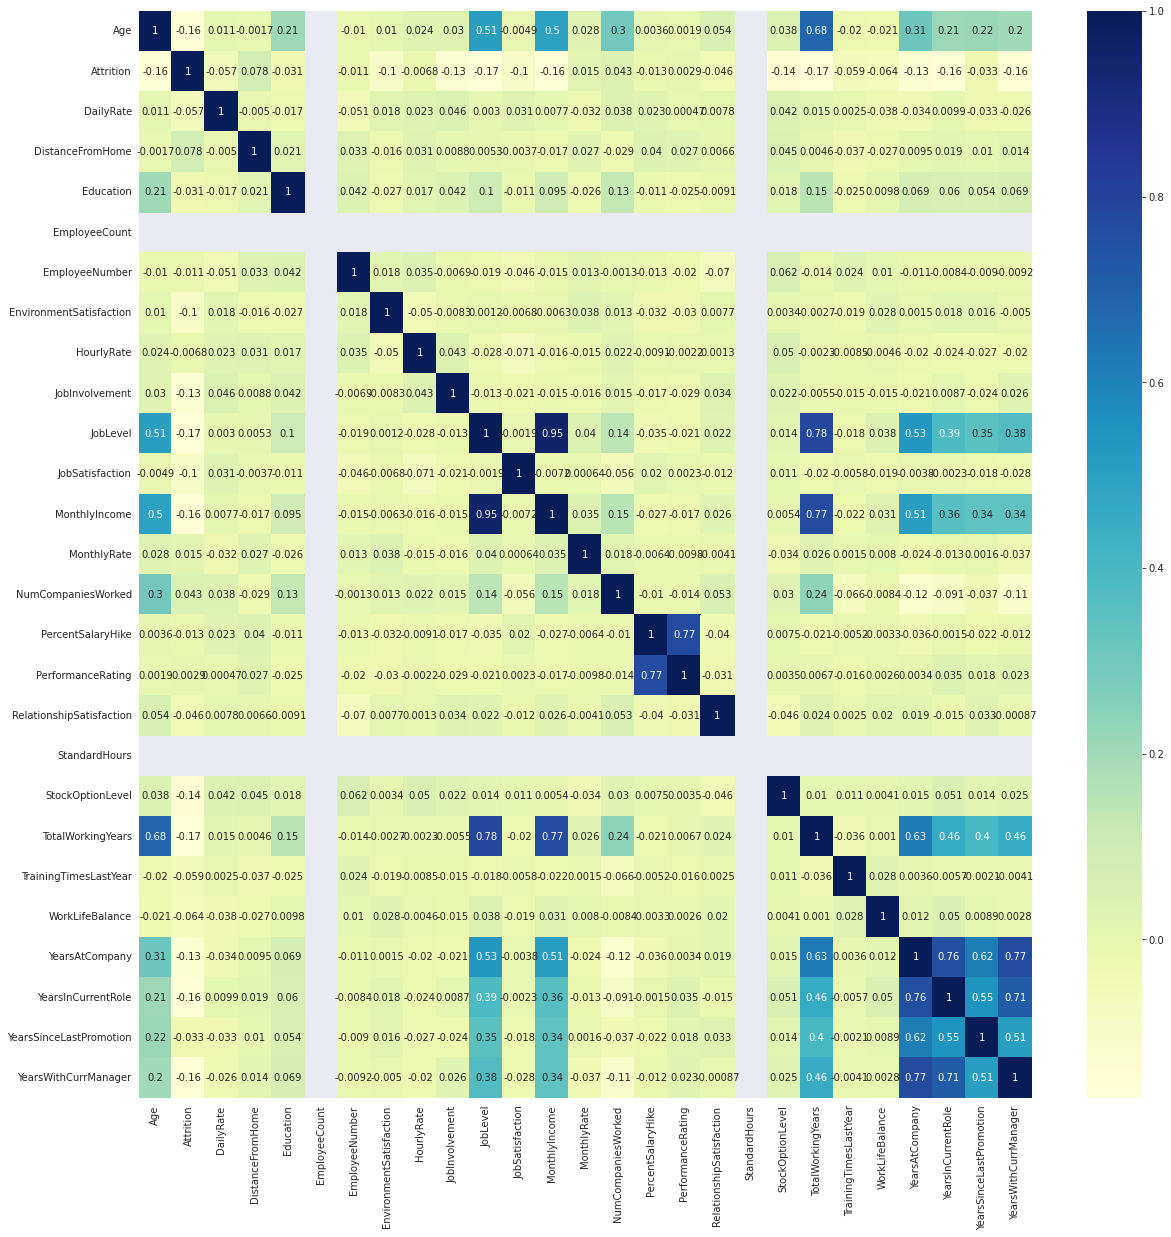

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

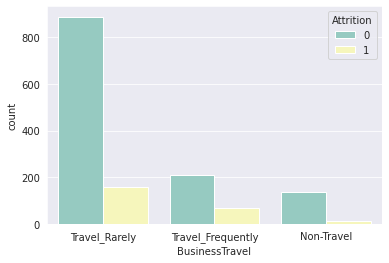

In [ ]:
sns.countplot(x='BusinessTravel',palette = "Set3", hue='Attrition', data=df);

Travel rarely nonattrition values are more

Less arrtirtion in research and development

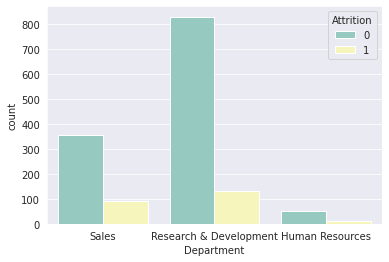

In [ ]:
sns.countplot(x='Department', hue='Attrition', palette = "Set3", data=df);

In [ ]:
data['Over18'].unique()

array(['Y'], dtype=object)

32 **features**

In [ ]:
data.shape

(1470, 35)

# Missing data
none of the data is nan or missing in the given dataset

In [ ]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

The value counts is does not look imbalanced

*   Sample data is not imbalanced
*   



In [ ]:
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

splitting the data to train and test removing dependent variable attrition

In [ ]:
X = data.drop('Attrition',axis = 1).copy()
X.dtypes

Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYea

Creating dummy values for categorical columns  to replace them during training

In [ ]:
X_encode = pd.get_dummies(X,columns = ['BusinessTravel','Department','EducationField',
                                      'Gender','JobRole','MaritalStatus','OverTime'])
X_encode.shape

(1470, 55)

In [ ]:
data['Attrition'] = data['Attrition'].replace({'No': 0, 'Yes': 1}).astype(int)
y = data['Attrition'].copy()

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_encode,y,
                                                random_state = 1,
                                                stratify = y)


In [ ]:
print(y_train.shape)
print(y_test.shape)

(1102,)
(368,)


In [ ]:
print(sum(y)/len(y))
print(sum(y_train)/len(y_train))
print(sum(y_test)/len(y_test))


0.16122448979591836
0.16152450090744103
0.16032608695652173


In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Logistic Regression for  classsification binary problem

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(penalty="l2",solver="liblinear",C=0.5,max_iter=100)
log_reg.fit(X_train,y_train)
print('--------------------------------------------------------------------------')
print('Logistic Regression:')
print('Traning Model accruracy scores: {:.3f}'.format(log_reg.score(X_train,y_train)))
print('Test Model accruracy scores: {:.3f}'.format(log_reg.score(X_test,y_test)))
print('--------------------------------------------------------------------------')

ValueError: ignored

In [ ]:
plot_confusion_matrix(log_reg,
                     X_test,
                     y_test,
                     values_format = 'd',
                     display_labels= ['Did not leave','left'])

In [ ]:
log_reg=LogisticRegression(penalty="l2",solver="liblinear",C=0.5,max_iter=100,class_weight="balanced")
log_reg.fit(X_train,y_train)
print('--------------------------------------------------------------------------')
print('Logistic Regression:')
print('Traning Model accruracy scores: {:.3f}'.format(log_reg.score(X_train,y_train)))
print('Test Model accruracy scores: {:.3f}'.format(log_reg.score(X_test,y_test)))
print('--------------------------------------------------------------------------')

In [ ]:
plot_confusion_matrix(log_reg,
                     X_test,
                     y_test,
                     values_format = 'd',
                     display_labels= ['not churned','churned'])

Logistic regression works look lets have an idea at xgboost

#y XGBoost Model

In [ ]:
clf_xgb = xgb.XGBClassifier(seed=70,
                        objective='binary:logistic',
                        eval_metric="logloss", ## this avoids warning...
                        gamma=0.25,
                        learning_rate=0.1,
                        max_depth=5,
                        reg_lambda=10,
                        scale_pos_weight=6,
                        subsample=0.8,
                        colsample_bytree=0.5,
                        use_label_encoder=False)

In [ ]:
clf_xgb.fit(X_train,
            y_train,
            early_stopping_rounds = 10,
            eval_metric = 'auc',
            eval_set = [(X_test,y_test)],
            verbose = True)

plot_confusion_matrix(clf_xgb,
                     X_test,
                     y_test,
                     values_format = 'd',
                     display_labels= ['not churned','churned'])

As looking at to the confusion metrics Xg works better than LR